In [34]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [35]:
# Data Processing and Data Exploration

In [39]:
df = pd.read_csv('C:/Users/Pankaj Aggarwal/Desktop/Projects/Titanic Project/train.csv')
df = df.set_index("PassengerId")

In [40]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


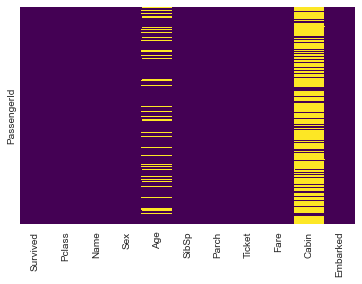

In [41]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

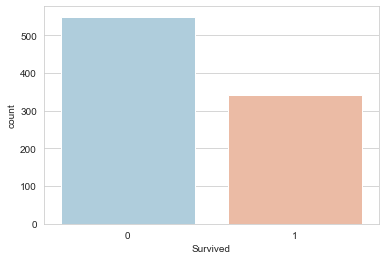

In [42]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df, palette = 'RdBu_r') # palette is not necessary

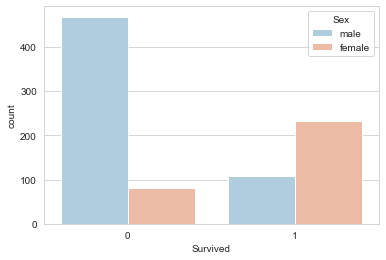

In [43]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'RdBu_r')

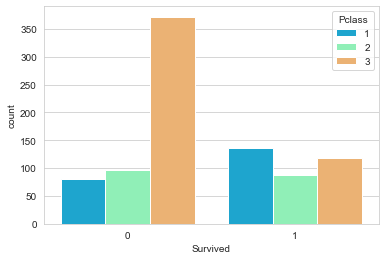

In [44]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'rainbow')

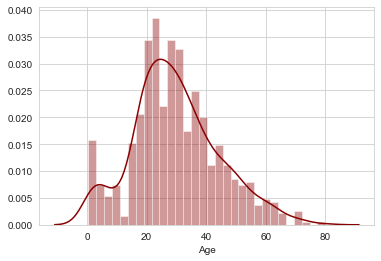

In [45]:
sns.distplot(df['Age'].dropna(), kde=True, color = 'darkred', bins=30)

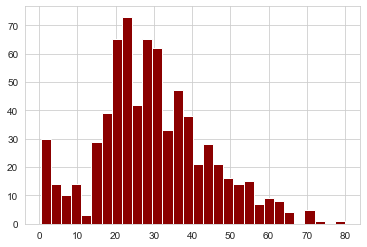

In [46]:
df['Age'].hist(color='darkred', bins=30, alpha=1)  # alpha used for color density

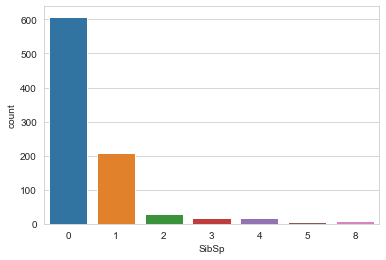

In [47]:
sns.countplot(df['SibSp'])# or sns.countplot(x = 'SibSp', data = df)

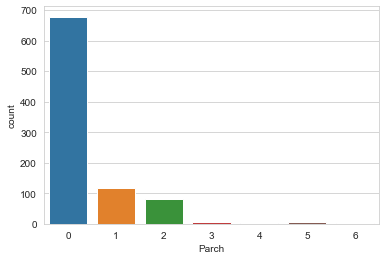

In [48]:
sns.countplot(df['Parch']) # or sns.countplot(x = 'Parch', data = df)

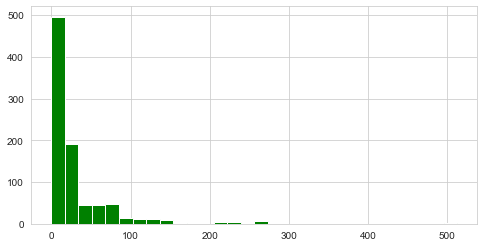

In [49]:
df['Fare'].hist(bins=30, color='green',figsize=(8,4))

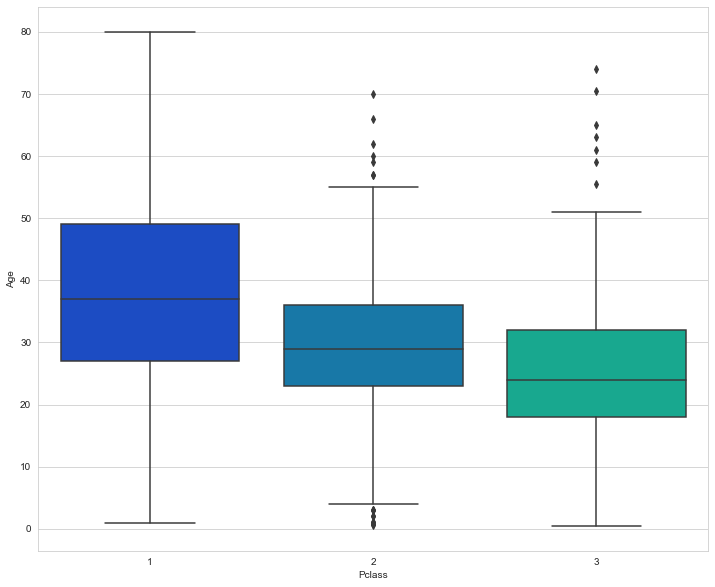

In [50]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['Pclass'], y=df['Age'], palette='winter')
# median for Pclass=1, age = 37, Pclass=2, age = 29, Pclass=3, age=24

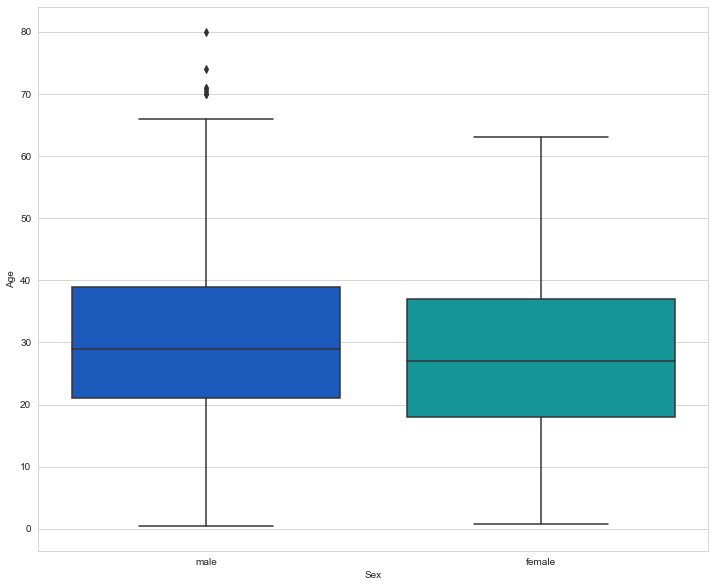

In [51]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['Sex'], y=df['Age'], palette='winter')
# median of male is 29, female is 27, not much difference

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 24
    else:
            return Age

In [57]:
## Apply the above function
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


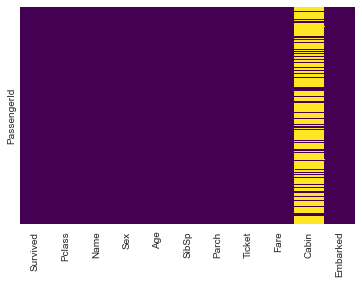

In [58]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [59]:
df.drop(['Cabin','Ticket','Name'], inplace=True, axis=1)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


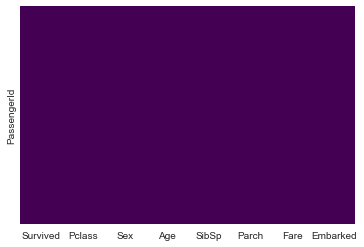

In [61]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

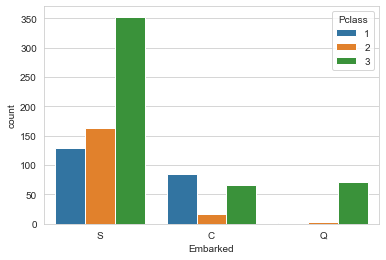

In [62]:
sns.countplot(df['Embarked'], hue=df['Pclass'])

In [63]:
# Our data is now cleaned

In [64]:
x = df.iloc[:,1:8]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S
888,1,female,19.0,0,0,30.0000,S
889,3,female,24.0,1,2,23.4500,S


In [65]:
y = df.iloc[:,:1].values.reshape(-1,1)

In [66]:
x = pd.get_dummies(x, drop_first=True)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
2,1,38.0,1,0,71.2833,0,0,0
3,3,26.0,0,0,7.9250,0,0,1
4,1,35.0,1,0,53.1000,0,0,1
5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,1,0,1
888,1,19.0,0,0,30.0000,0,0,1
889,3,24.0,1,2,23.4500,0,0,1


## Logistic Regression - Attempt 1

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2)
reg = LogisticRegression(solver='lbfgs',max_iter=400)
reg.fit(x_train,y_train.ravel())
y_predict1 = reg.predict(x_test)
y_prob1 = reg.predict_proba(x_test)[:,1]

In [68]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict1)
matrix

array([[143,  17],
       [ 37,  71]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict1)
score

0.7985074626865671

In [70]:
tn, fp, fn, tp = matrix.ravel()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       160
           1       0.81      0.66      0.72       108

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268



In [72]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_prob1)
auc

0.8371817129629631

In [73]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_prob1)  # will give diff fpr, tpr and threshold value for diff pred prob of y

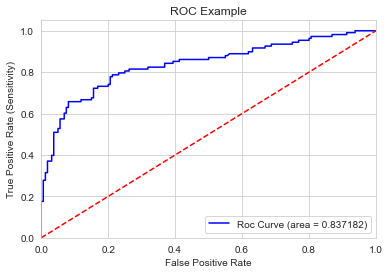

In [74]:
plt.plot(fpr1, tpr1, color = 'b', label='Roc Curve (area = %2f)' %auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Example')
plt.legend(loc='lower right')  # to show the area in lower right
plt.show()

In [75]:
acc = []
for thres in threshold1:
    y_predict1 = np.where(y_prob1>thres,1,0)
    acc.append(accuracy_score(y_test,y_predict1, normalize = True))
acc = pd.concat([pd.Series(threshold1), pd.Series(acc)], axis=1)
acc.columns= ['Thresholds', 'Accuracy']
acc.sort_values(by='Accuracy', ascending=False, inplace=True)
acc

,Thresholds,Accuracy
24,0.523252,0.809701
23,0.546404,0.805970
22,0.551701,0.802239
21,0.573346,0.798507
25,0.486905,0.794776
...,...,...
86,0.041213,0.451493
87,0.041201,0.447761
88,0.039354,0.440299
89,0.039353,0.436567


In [76]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob1.reshape(1,-1),0.523252)
y_predict_class1 = y_predict_class1.astype(int)

C:\Users\Pankaj Aggarwal\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.523252 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [77]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.ravel(), y_predict_class1.ravel())
matrix

array([[147,  13],
       [ 37,  71]], dtype=int64)

In [78]:
score = accuracy_score(y_test.ravel(), y_predict_class1.ravel())
score

0.8134328358208955

In [79]:
x.iloc[:,1:].corr()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Age,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.015733
SibSp,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
Sex_male,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Embarked_Q,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
Embarked_S,0.015733,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


# Random Forest Technique - Attempt 2

In [80]:
from sklearn.ensemble import RandomForestClassifier  # use regressor for regression instead of classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train,y_train.ravel())
y_predict2 = clf.predict(x_test)
y_prob2 = clf.predict_proba(x_test)[:,1]

In [81]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict2))

Accuracy:  0.8097014925373134


In [82]:
auc = roc_auc_score(y_test, y_prob2)
auc

0.8414062499999999

In [83]:
fpr2, tpr2, threshold2 = roc_curve(y_test, y_prob2)
acc = []
for thres in threshold2:
    y_predict2 = np.where(y_prob1>thres,1,0)
    acc.append(accuracy_score(y_test,y_predict2, normalize = True))
acc = pd.concat([pd.Series(threshold2), pd.Series(acc)], axis=1)
acc.columns= ['Thresholds', 'Accuracy']
acc.sort_values(by='Accuracy', ascending=False, inplace=True)
acc

,Thresholds,Accuracy
33,0.530786,0.809701
34,0.525786,0.809701
32,0.550000,0.805970
35,0.500000,0.798507
43,0.410000,0.794776
...,...,...
87,0.015000,0.414179
88,0.012262,0.410448
89,0.010000,0.406716
90,0.003409,0.402985


In [84]:
from sklearn.preprocessing import binarize
y_predict_class2 = binarize(y_prob1.reshape(1,-1),0.530786)
y_predict_class2 = y_predict_class2.astype(int)

C:\Users\Pankaj Aggarwal\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.530786 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [85]:
score = accuracy_score(y_test.ravel(), y_predict_class1.ravel())
score

0.8134328358208955

# AdaBoost - Attempt 3

In [86]:
from sklearn.ensemble import AdaBoostClassifier
aclf = AdaBoostClassifier(learning_rate=1, n_estimators=100)
aclf.fit(x_train, y_train.ravel())
y_predict3 = aclf.predict(x_test)
y_prob3 = aclf.predict_proba(x_test)

In [87]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict3))

Accuracy:  0.8022388059701493


# XgBoost - Attempt 4

In [88]:
from xgboost.sklearn import XGBClassifier

In [89]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_predict4 = xgb.predict(x_test)
y_prob4 = xgb.predict_proba(x_test)[:,1]

C:\Users\Pankaj Aggarwal\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [90]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict4))

Accuracy:  0.7873134328358209


In [91]:
new = pd.read_csv('C:/Users/Pankaj Aggarwal/Desktop/Projects/Titanic Project/test.csv')
new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
new.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True, axis=1)

In [93]:
new

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


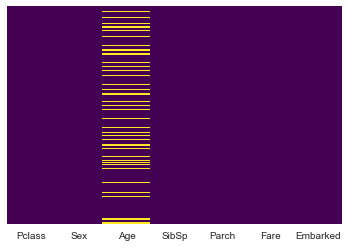

In [94]:
sns.heatmap(new.isnull(), yticklabels=False, cbar=False, cmap='viridis')

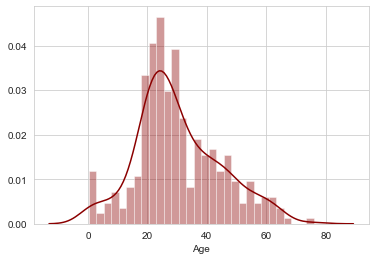

In [95]:
sns.distplot(new['Age'].dropna(), kde=True, color = 'darkred', bins=30)

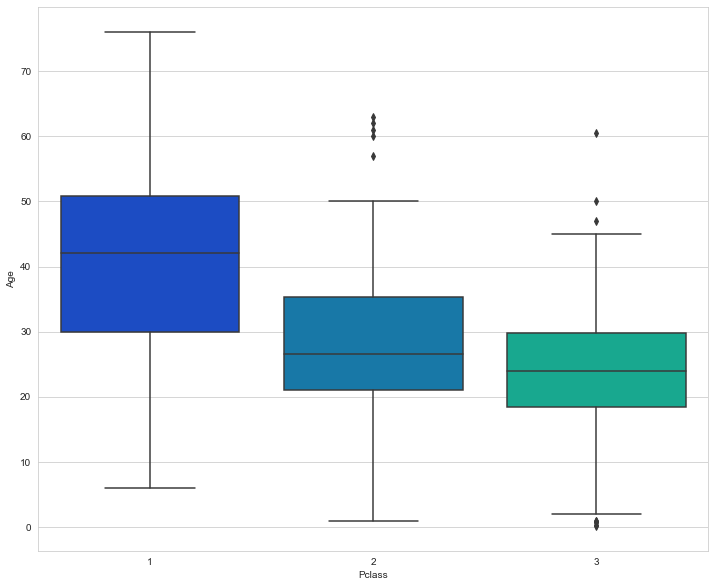

In [96]:
plt.figure(figsize=(12,10))
sns.boxplot(x=new['Pclass'], y=new['Age'], palette='winter')

In [97]:
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 43
        if Pclass==2:
            return 26
        if Pclass==3:
            return 24
    else:
            return Age

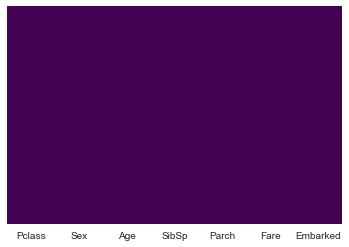

In [98]:
new['Age'] = new[['Age','Pclass']].apply(impute_age1,axis=1)
sns.heatmap(new.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [99]:
new = pd.get_dummies(new, drop_first=True)
new.shape

(418, 8)

In [100]:
new.dropna(inplace=True)
new.shape

(417, 8)

In [101]:
y_test = clf.predict(new)
y_test = pd.DataFrame(y_test)
y_test

,0
0,0
1,0
2,0
3,1
4,1
...,...
412,0
413,1
414,0
415,0


In [234]:
# y_test.to_excel(r'C:/Users/Pankaj Aggarwal/Downloads/Tit.xlsx', index = False)